### **📊 Introduction**
This fictional IBM dataset helps analyze factors affecting employee attrition, exploring links between job role, distance from home, education, income, and turnover.

### **🎯 Goals:**
The main objectives of this analysis are:
*   Identify key factors influencing employee attrition.
*   Compare attrition rates across job roles, distance from home, and education levels.
*   Analyze income differences related to attrition.
*   Generate insights to help reduce employee turnover.

### **🗂️ Data**

The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### **1️⃣ Load Data**

In [2]:
import kagglehub

path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
print("path to dataset files: ", path)

path to dataset files:  /kaggle/input/ibm-hr-analytics-attrition-dataset


In [3]:
# Load Data
data = pd.read_csv(path + "/WA_Fn-UseC_-HR-Employee-Attrition.csv")

### **2️⃣ Explore the Data**

In [4]:
# Data Overview
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [5]:
# Check Data for Null Values and Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Shape of Data
data.shape

(1470, 35)

In [7]:
# Display Descriptive Analysis of the Dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Check Number of Null Values in the DataFrame
data.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [9]:
# Check DataFrame for Duplicates
data.duplicated().sum()

np.int64(0)

### **3️⃣ Clean the Data**

In [10]:
# Drop useless columns
data.drop(['EmployeeNumber', 'EmployeeCount', 'HourlyRate', 'MonthlyRate', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [11]:
# A copy for the model
data_numeric = data.copy()

# Replace ordinal numbers with labels for better visuals
data['Education'] = data['Education'].map({
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
})

data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

data['JobInvolvement'] = data['JobInvolvement'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

data['JobSatisfaction'] = data['JobSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

data['PerformanceRating'] = data['PerformanceRating'].map({
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
})

data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].map({
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
})

data['WorkLifeBalance'] = data['WorkLifeBalance'].map({
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
})

In [12]:
# Shorten long column names
data = data.rename(columns={
    'DistanceFromHome': 'HomeDist',
    'EducationField': 'EduField',
    'EnvironmentSatisfaction': 'EnvSatisfaction',
    'JobSatisfaction': 'JobSatisfaction',
    'NumCompaniesWorked': 'NumCompanies',
    'PercentSalaryHike': 'SalaryHike',
    'PerformanceRating': 'PerfRating',
    'RelationshipSatisfaction': 'RelSatisfaction',
    'StandardHours': 'StdHours',
    'StockOptionLevel': 'StockLevel',
    'TotalWorkingYears': 'TotalYrs',
    'TrainingTimesLastYear': 'TrainingsLastYr',
    'WorkLifeBalance': 'WorkLife',
    'YearsAtCompany': 'YrsAtCompany',
    'YearsInCurrentRole': 'YrsInRole',
    'YearsSinceLastPromotion': 'YrsSinceProm',
    'YearsWithCurrManager': 'YrsWithManager'
})

In [13]:
# Shorten long JobRole names
role_map = {
    'Sales Executive': 'SalesExec',
    'Research Scientist': 'ResearchSci',
    'Laboratory Technician': 'LabTech',
    'Manufacturing Director': 'MfgDirector',
    'Healthcare Representative': 'HealthRep',
    'Sales Representative': 'SalesRep',
    'Research Director': 'ResearchDir',
    'Human Resources': 'HR'
}

data['JobRole'] = data['JobRole'].map(role_map)

In [14]:
# Shorten Department values
dept_map = {
    'Research & Development': 'R&D',
    'Human Resources': 'HR'
}

data['Department'] = data['Department'].replace(dept_map)

In [15]:
# Do One-Hot Encoding for 'MaritalStatus'
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns detected:", categorical_cols)
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Categorical columns detected: ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EduField', 'EnvSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerfRating', 'RelSatisfaction', 'WorkLife']


### **4️⃣ Analyze Relationships**

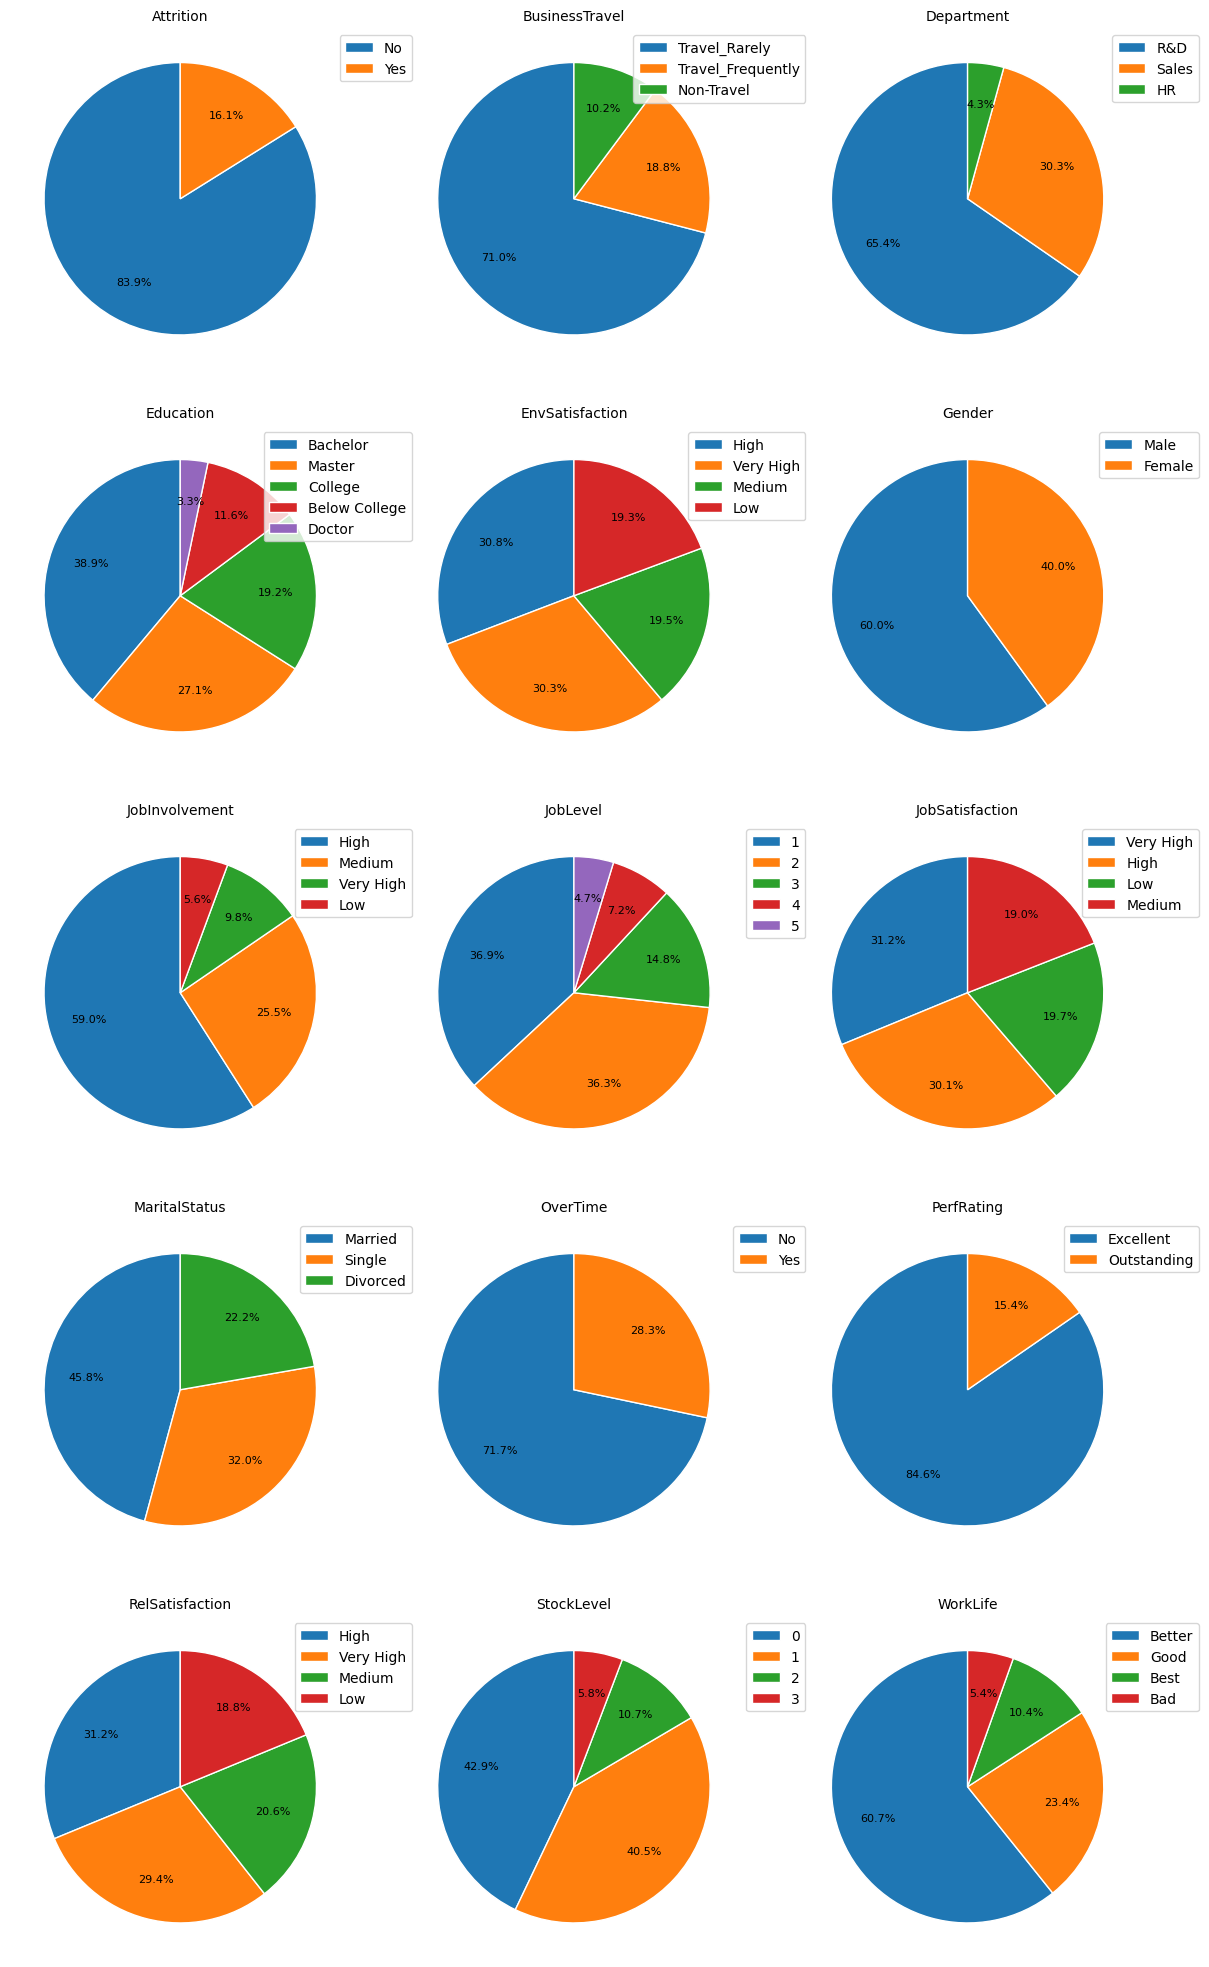

In [16]:
# Pie plot all Columns with maximum 5 unique values
cols_5unique=[col for col in data.columns if data[col].nunique()<=5 and data[col].nunique()>1]
n=len(cols_5unique)
cols=3
rows=n//cols+int(n%cols!=0)
fig,axes=plt.subplots(rows,cols,figsize=(cols*4,rows*4))
axes=axes.flatten()
for i,col in enumerate(cols_5unique):
    counts=data[col].value_counts()
    counts.plot.pie(ax=axes[i],labels=None,autopct='%1.1f%%',startangle=90,textprops={'fontsize':8},pctdistance=0.7,wedgeprops={'linewidth':1,'edgecolor':'white'})
    axes[i].set_title(col,fontsize=10)
    axes[i].set_ylabel('')
    axes[i].legend(labels=counts.index,loc='upper right',bbox_to_anchor=(1.2,1))
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

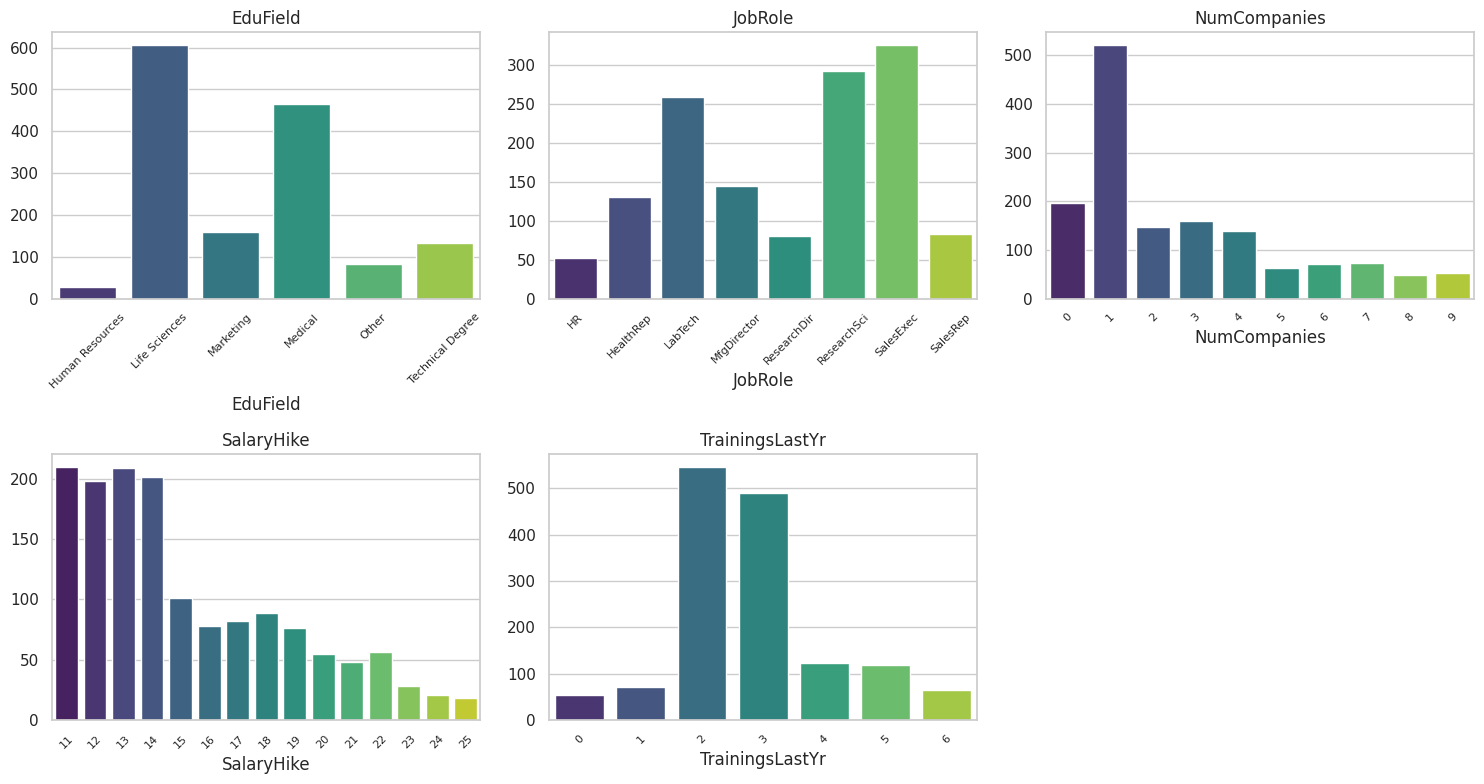

In [17]:
# bar plot all Columns with more than 5 unique values and maximum 15
sns.set(style="whitegrid")
cols_6to15 = [col for col in data.columns if 5 < data[col].nunique() <= 15]
n = len(cols_6to15)
cols = 3
rows = -(-n // cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()
for i, col in enumerate(cols_6to15):
    counts = data[col].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette="viridis")
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

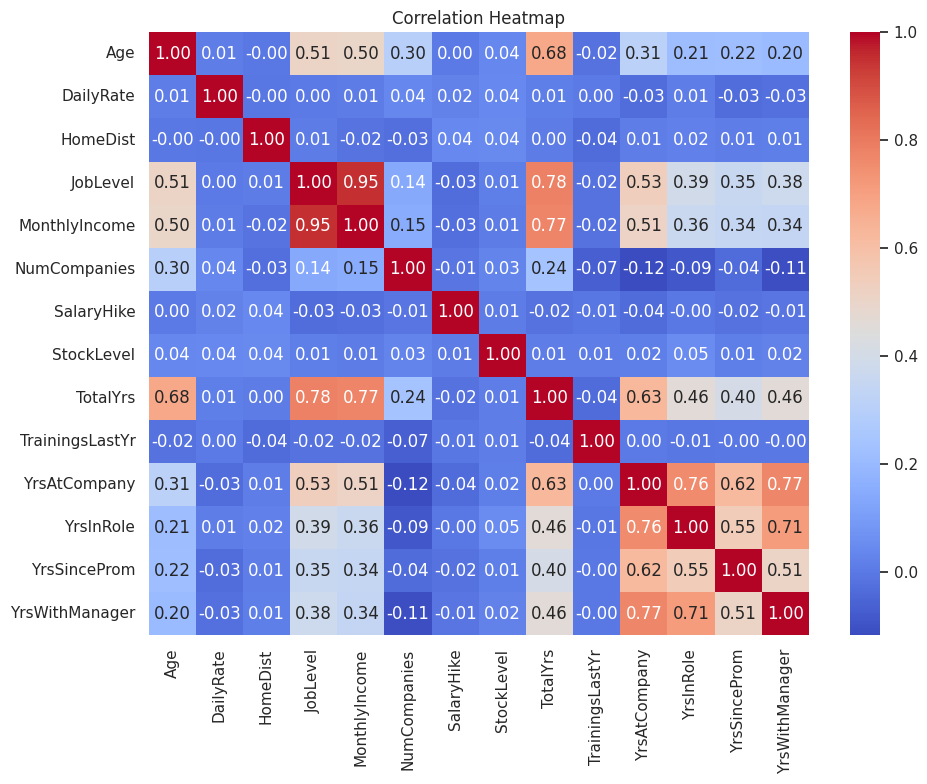

In [18]:
# Heatmap of correlation
num_df = data.select_dtypes(include='number')
corr = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

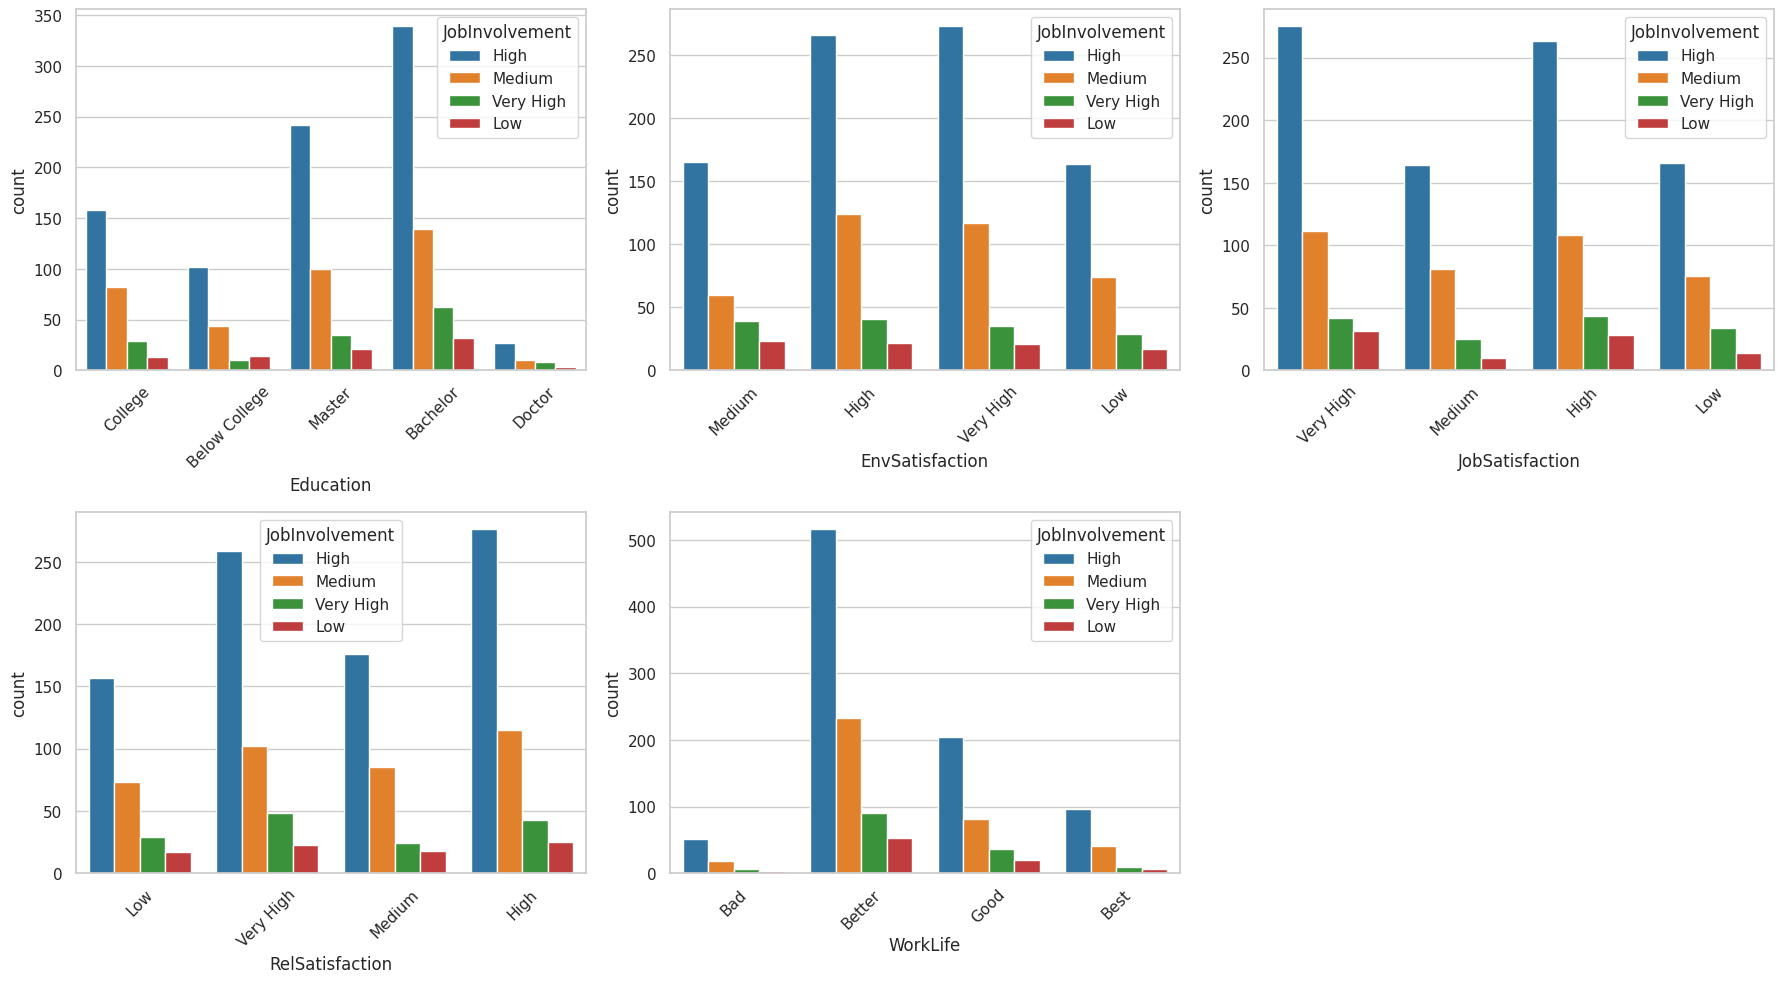

In [19]:
# Job Involvement vs Categorical columns
cols1 = ['Education', 'EnvSatisfaction', 'JobSatisfaction', 'RelSatisfaction', 'WorkLife']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(cols1):
    sns.countplot(x=col, hue='JobInvolvement', data=data, ax=axes[i], palette=sns.color_palette('tab10'))
    axes[i].tick_params(axis='x', rotation=45)
for j in range(len(cols1), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

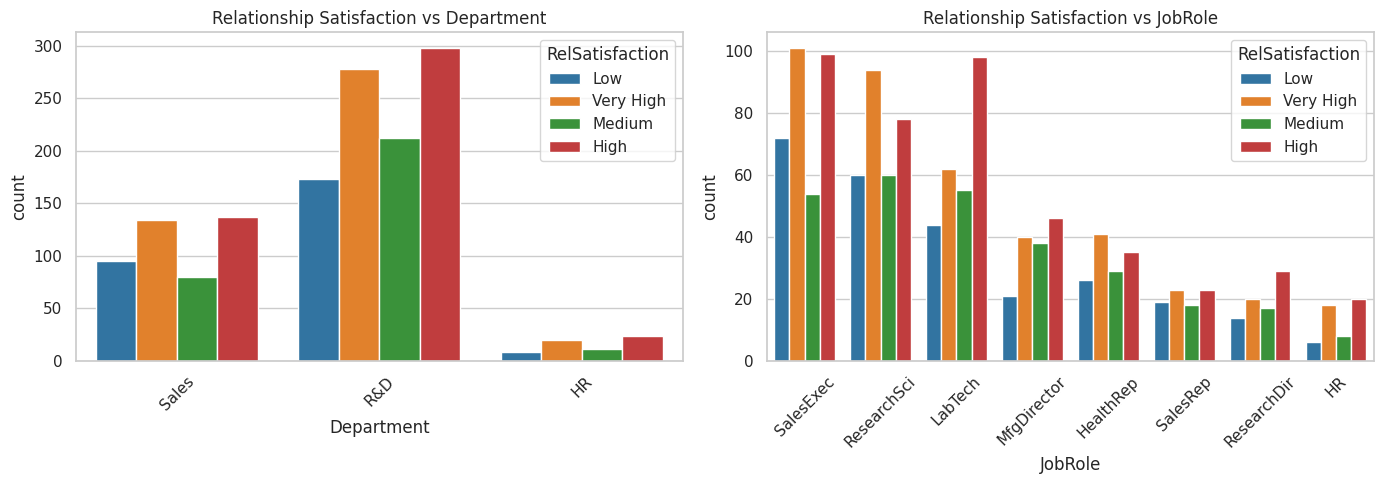

In [20]:
# Relationship Satisfaction vs Department vs Job Role
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x='Department', hue='RelSatisfaction', data=data, ax=axes[0], palette='tab10')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Relationship Satisfaction vs Department')

sns.countplot(x='JobRole', hue='RelSatisfaction', data=data, ax=axes[1], palette='tab10')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Relationship Satisfaction vs JobRole')

plt.tight_layout()
plt.show()

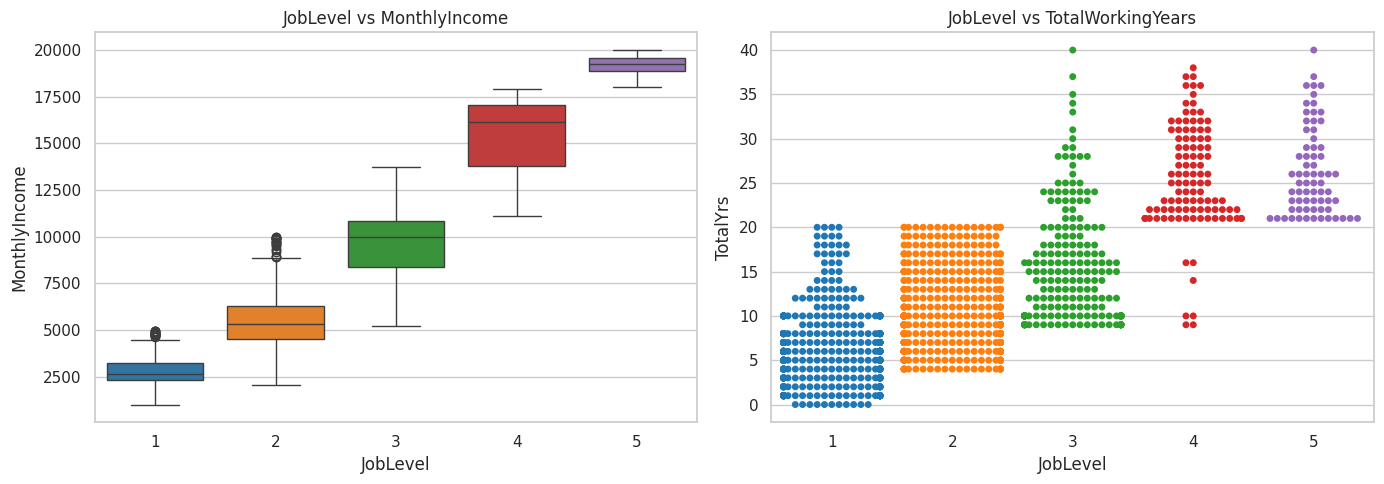

In [21]:
# Job Level vs Monthly Income vs Total Working Years
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data, ax=axes[0], palette='tab10')
axes[0].set_title('JobLevel vs MonthlyIncome')

sns.swarmplot(x='JobLevel', y='TotalYrs', data=data, ax=axes[1], palette='tab10')
axes[1].set_title('JobLevel vs TotalWorkingYears')

plt.tight_layout()
plt.show()

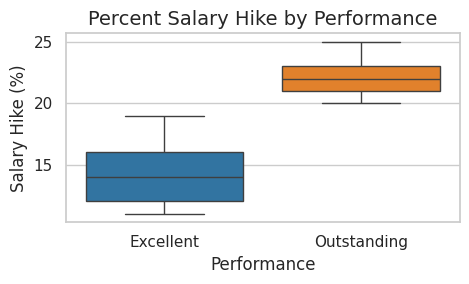

In [22]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='PerfRating', y='SalaryHike', data=data, palette='tab10')
plt.title('Percent Salary Hike by Performance', fontsize=14)
plt.xlabel('Performance')
plt.ylabel('Salary Hike (%)')
plt.tight_layout()
plt.show()

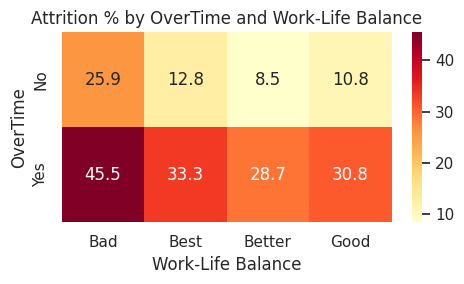

In [23]:
# Crosstab: % Attrition for OverTime + WorkLife
plt.figure(figsize=(5, 3))
ct = pd.crosstab(
    data['OverTime'],
    data['WorkLife'],
    data['Attrition'] == 'Yes',
    aggfunc='mean') * 100
sns.heatmap(ct, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Attrition % by OverTime and Work-Life Balance')
plt.ylabel('OverTime')
plt.xlabel('Work-Life Balance')
plt.tight_layout()
plt.show()

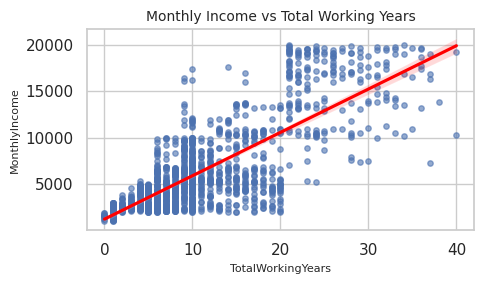

In [24]:
# Monthly Income by Total Working Years
plt.figure(figsize=(5, 3))
sns.regplot(x='TotalYrs', y='MonthlyIncome', data=data, scatter_kws={'s':15,'alpha':0.6}, line_kws={'color':'red'})
plt.title('Monthly Income vs Total Working Years', fontsize=10)
plt.xlabel('TotalWorkingYears', fontsize=8)
plt.ylabel('MonthlyIncome', fontsize=8)
plt.tight_layout()
plt.show()

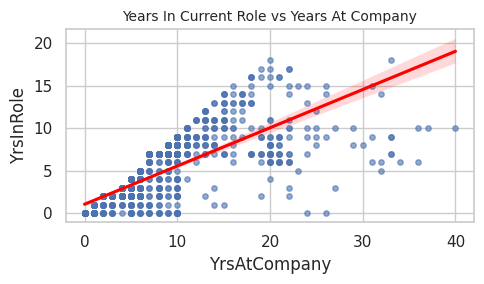

In [25]:
# Years In Current Role vs Years At Company
plt.figure(figsize=(5, 3))
sns.regplot(x='YrsAtCompany', y='YrsInRole', data=data, scatter_kws={'s':15,'alpha':0.6}, line_kws={'color':'red'})
plt.title('Years In Current Role vs Years At Company', fontsize=10)
plt.tight_layout()
plt.show()

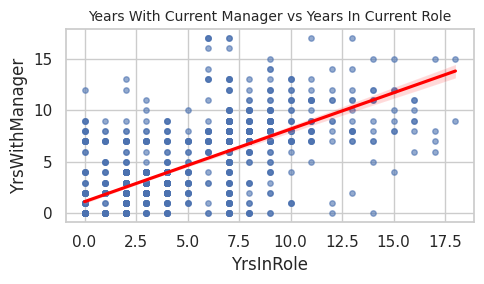

In [26]:
# Years with Current Manager vs Years In Current Role
plt.figure(figsize=(5, 3))
sns.regplot(x='YrsInRole', y='YrsWithManager', data=data, scatter_kws={'s':15,'alpha':0.6}, line_kws={'color':'red'})
plt.title('Years With Current Manager vs Years In Current Role', fontsize=10)
plt.tight_layout()
plt.show()

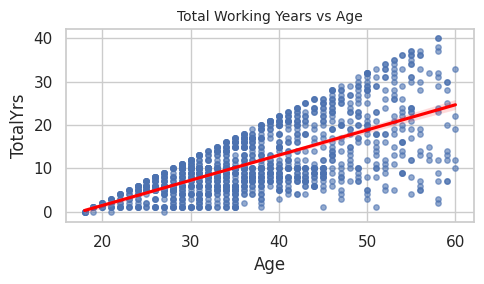

In [27]:
# Total Working Years vs Age
plt.figure(figsize=(5, 3))
sns.regplot(x='Age', y='TotalYrs', data=data, scatter_kws={'s':15,'alpha':0.6}, line_kws={'color':'red'})
plt.title('Total Working Years vs Age', fontsize=10)
plt.tight_layout()
plt.show()

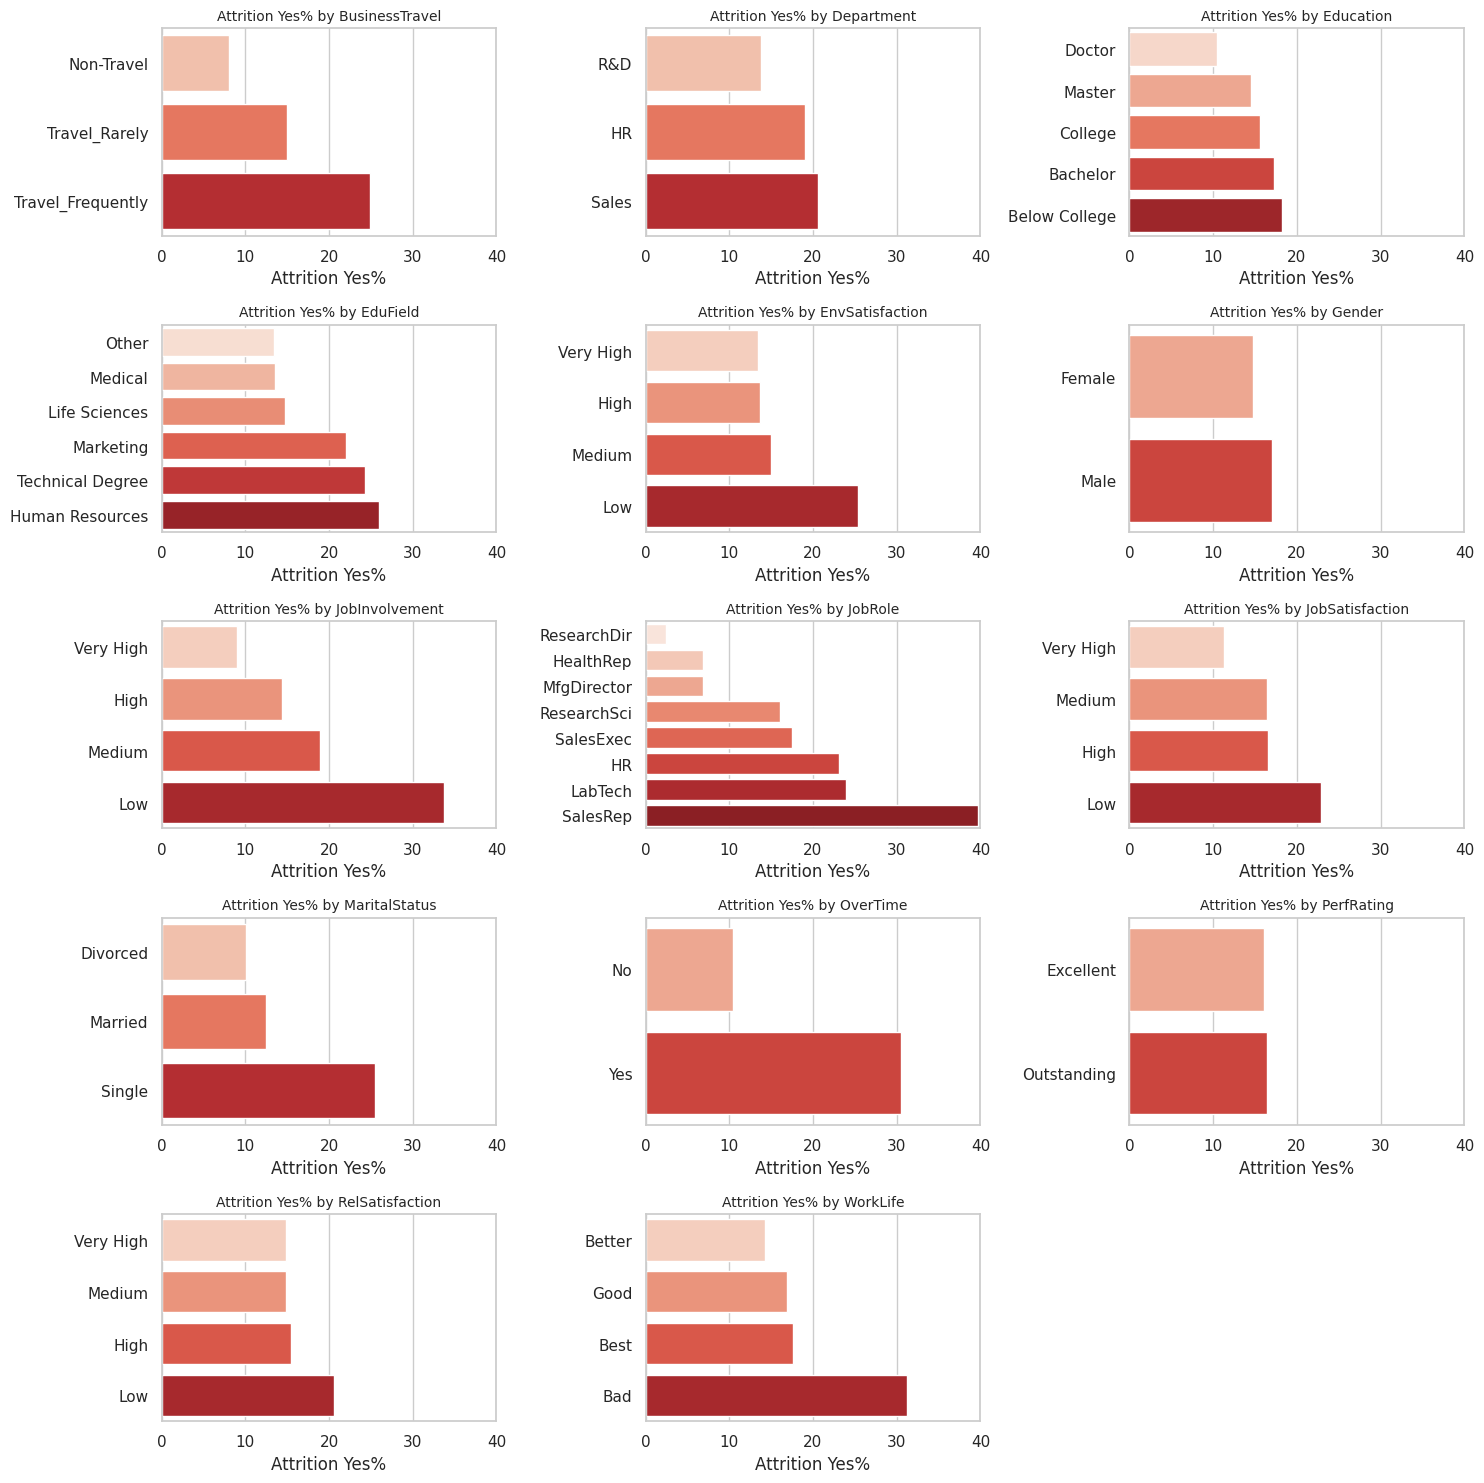

In [28]:
# Attrition Yes% Across All Categorical Features
cat_cols = data.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Attrition']

result = []
for col in cat_cols:
    temp = pd.crosstab(data[col], data['Attrition'], normalize='index') * 100
    temp = temp.reset_index()
    temp = temp.rename(columns={'Yes': 'AttritionYes%', col: 'CategoryValue'})
    temp['Column'] = col
    result.append(temp[['Column', 'CategoryValue', 'AttritionYes%']])

df_yes = pd.concat(result)

n = len(df_yes['Column'].unique())
cols = 3
rows = (n // cols) + int(n % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
axes = axes.flatten()

for i, col in enumerate(df_yes['Column'].unique()):
    temp = df_yes[df_yes['Column'] == col].sort_values('AttritionYes%')
    sns.barplot(x='AttritionYes%', y='CategoryValue', data=temp, ax=axes[i], palette='Reds')
    axes[i].set_title(f'Attrition Yes% by {col}', fontsize=10)
    axes[i].set_xlim(0, 40)
    axes[i].set_xlabel('Attrition Yes%')
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

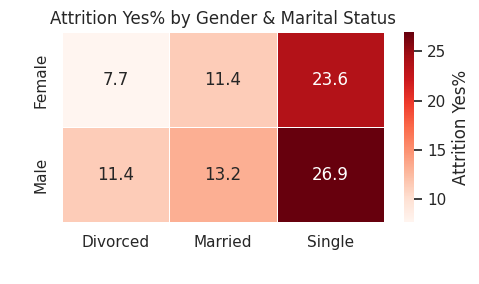

In [29]:
# Attrition Yes% by Gender & Marital Status
cross = pd.crosstab([data['Gender'], data['MaritalStatus']], data['Attrition'], normalize='index') * 100
cross = cross.reset_index()
cross = cross.rename(columns={'Yes': 'AttritionYes%'})

pivot = cross.pivot(index='Gender', columns='MaritalStatus', values='AttritionYes%')

plt.figure(figsize=(5, 3))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='Reds', linewidths=.5, cbar_kws={'label': 'Attrition Yes%'})
plt.title('Attrition Yes% by Gender & Marital Status')
plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.show()

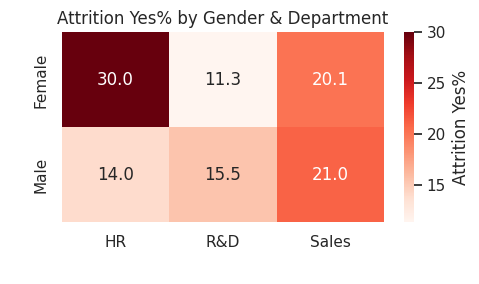

In [30]:
# Attrition Yes% by Gender & Department
cross = pd.crosstab([data['Gender'], data['Department']], data['Attrition'], normalize='index') * 100
cross = cross.reset_index().rename(columns={'Yes': 'AttritionYes%'})
pivot = cross.pivot(index='Gender', columns='Department', values='AttritionYes%')

plt.figure(figsize=(5, 3))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Attrition Yes%'})
plt.title('Attrition Yes% by Gender & Department')
plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.show()

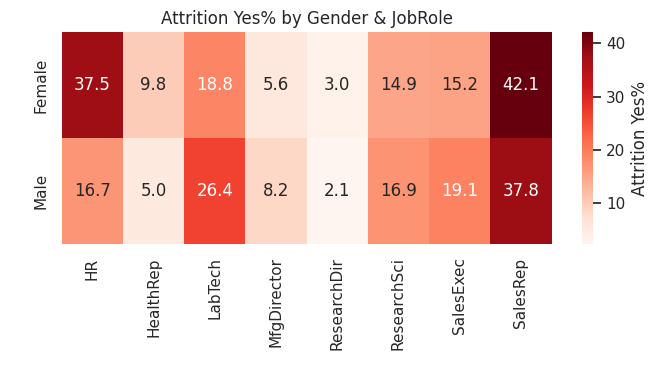

In [31]:
# Attrition Yes% by Gender & JobRole
cross = pd.crosstab([data['Gender'], data['JobRole']], data['Attrition'], normalize='index') * 100
cross = cross.reset_index().rename(columns={'Yes': 'AttritionYes%'})
pivot = cross.pivot(index='Gender', columns='JobRole', values='AttritionYes%')

plt.figure(figsize=(7, 4))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Attrition Yes%'})
plt.title('Attrition Yes% by Gender & JobRole')
plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.show()

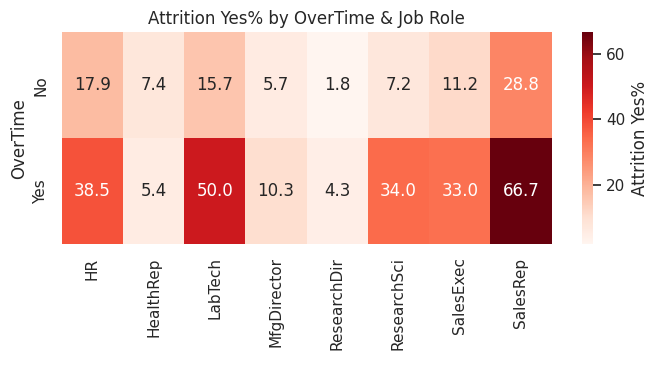

In [32]:
# Attrition Yes% by OverTime & Job Role
cross = pd.crosstab([data['OverTime'], data['JobRole']], data['Attrition'], normalize='index') * 100
cross = cross.reset_index().rename(columns={'Yes': 'AttritionYes%'})
pivot = cross.pivot(index='OverTime', columns='JobRole', values='AttritionYes%')

plt.figure(figsize=(7, 4))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Attrition Yes%'})
plt.title('Attrition Yes% by OverTime & Job Role')
plt.ylabel('OverTime')
plt.xlabel(' ')
plt.tight_layout()
plt.show()

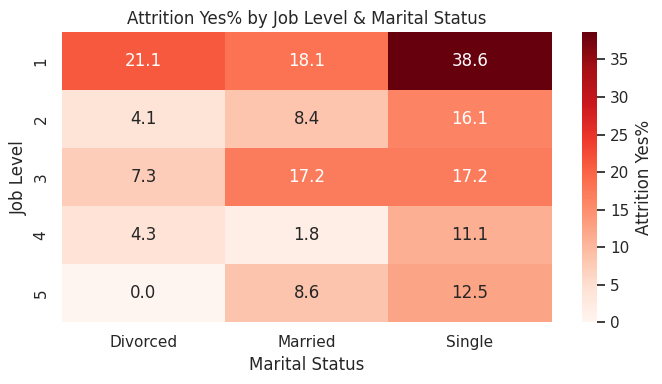

In [33]:
# Attrition Yes% by Job Level & Marital Status
cross = pd.crosstab([data['JobLevel'], data['MaritalStatus']], data['Attrition'], normalize='index') * 100
cross = cross.reset_index().rename(columns={'Yes': 'AttritionYes%'})
pivot = cross.pivot(index='JobLevel', columns='MaritalStatus', values='AttritionYes%')

plt.figure(figsize=(7, 4))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Attrition Yes%'})
plt.title('Attrition Yes% by Job Level & Marital Status')
plt.ylabel('Job Level')
plt.xlabel('Marital Status')
plt.tight_layout()
plt.show()

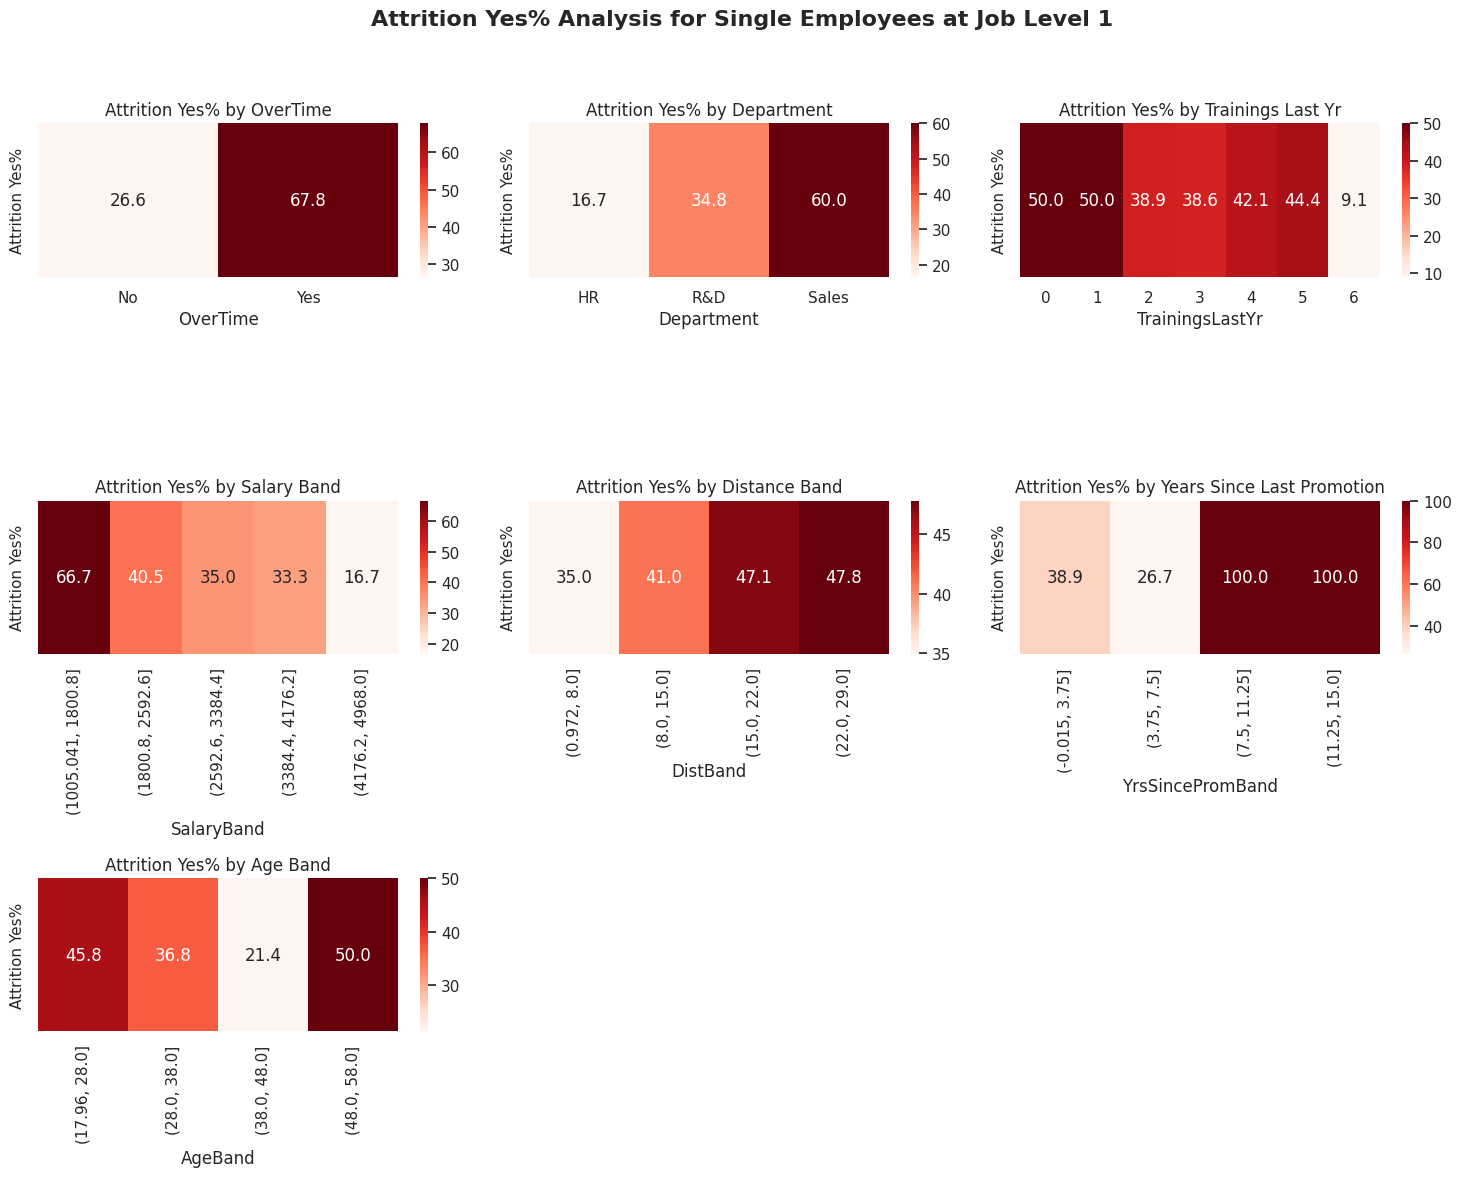

In [34]:
# Attrition Yes% Analysis for Single Employees at Job Level 1
subset = data[(data['JobLevel'] == 1) & (data['MaritalStatus'] == 'Single')]

subset['SalaryBand'] = pd.cut(subset['MonthlyIncome'], bins=5)
subset['DistBand'] = pd.cut(subset['HomeDist'], bins=4)
subset['YrsSincePromBand'] = pd.cut(subset['YrsSinceProm'], bins=4)
subset['AgeBand'] = pd.cut(subset['Age'], bins=4)

heatmap_cols = [
    ('OverTime', 'Attrition Yes% by OverTime'),
    ('Department', 'Attrition Yes% by Department'),
    ('TrainingsLastYr', 'Attrition Yes% by Trainings Last Yr'),
    ('SalaryBand', 'Attrition Yes% by Salary Band'),
    ('DistBand', 'Attrition Yes% by Distance Band'),
    ('YrsSincePromBand', 'Attrition Yes% by Years Since Last Promotion'),
    ('AgeBand', 'Attrition Yes% by Age Band')
]

n = len(heatmap_cols)
cols = 3
rows = (n // cols) + int(n % cols != 0)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

plt.suptitle(
    'Attrition Yes% Analysis for Single Employees at Job Level 1',
    fontsize=16, fontweight='bold'
)

for i, (col, title) in enumerate(heatmap_cols):
    pivot = pd.crosstab(subset[col], subset['Attrition'], normalize='index') * 100
    pivot = pivot.reset_index().rename(columns={'Yes': 'AttritionYes%'})
    sns.heatmap(
        pivot[[col, 'AttritionYes%']].set_index(col).T,
        annot=True, fmt='.1f',
        cmap='Reds',
        ax=axes[i]
    )
    axes[i].set_title(title)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col)
    axes[i].set_yticklabels(['Attrition Yes%'])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

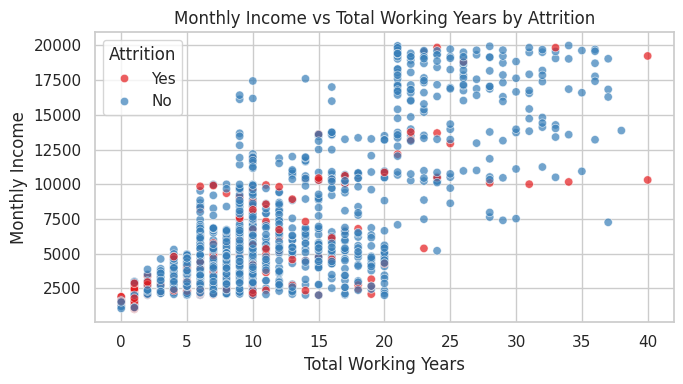

In [35]:
# Monthly Income vs Total Working Years by Attrition
plt.figure(figsize=(7, 4))
sns.scatterplot(x='TotalYrs', y='MonthlyIncome', hue='Attrition', data=data, alpha=0.7, palette='Set1')
plt.title('Monthly Income vs Total Working Years by Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()

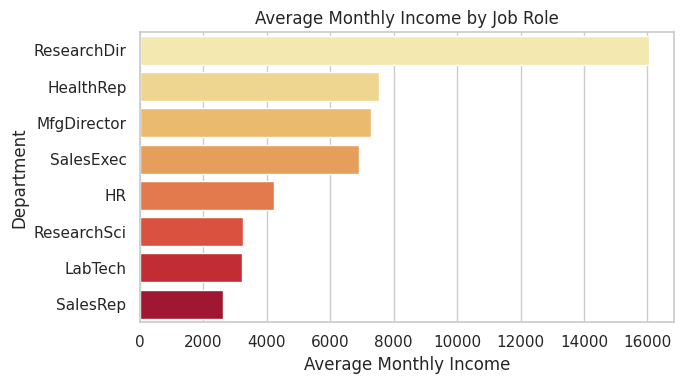

In [36]:
# Average Monthly Income by Job Role
pivot = data.groupby('JobRole')['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='MonthlyIncome', y='JobRole', data=pivot.sort_values('MonthlyIncome', ascending=False), palette='YlOrRd')
plt.title('Average Monthly Income by Job Role')
plt.xlabel('Average Monthly Income')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

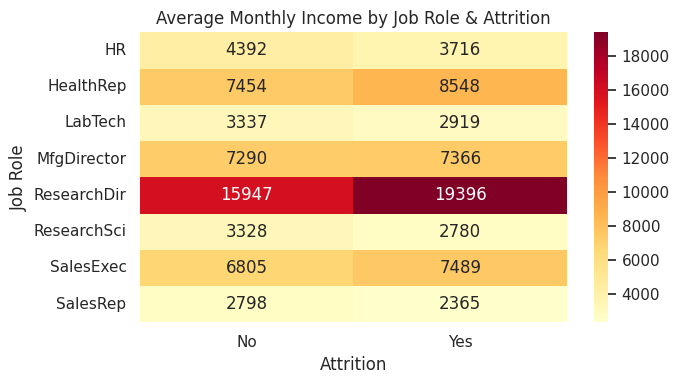

In [37]:
# Average Monthly Income by Job Role & Attrition
pivot = data.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].mean().reset_index()
pivot = pivot.pivot(index='JobRole', columns='Attrition', values='MonthlyIncome')

plt.figure(figsize=(7, 4))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Monthly Income by Job Role & Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

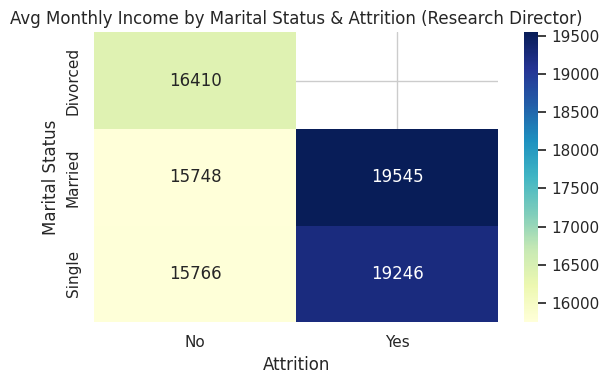

In [38]:
# Avg Monthly Income by Marital Status & Attrition (Research Director)
subset = data[data['JobRole'] == 'ResearchDir']
pivot = subset.groupby(['MaritalStatus', 'Attrition'])['MonthlyIncome'].mean().reset_index()
pivot_table = pivot.pivot(index='MaritalStatus', columns='Attrition', values='MonthlyIncome')

plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Avg Monthly Income by Marital Status & Attrition (Research Director)')
plt.xlabel('Attrition')
plt.ylabel('Marital Status')
plt.tight_layout()
plt.show()

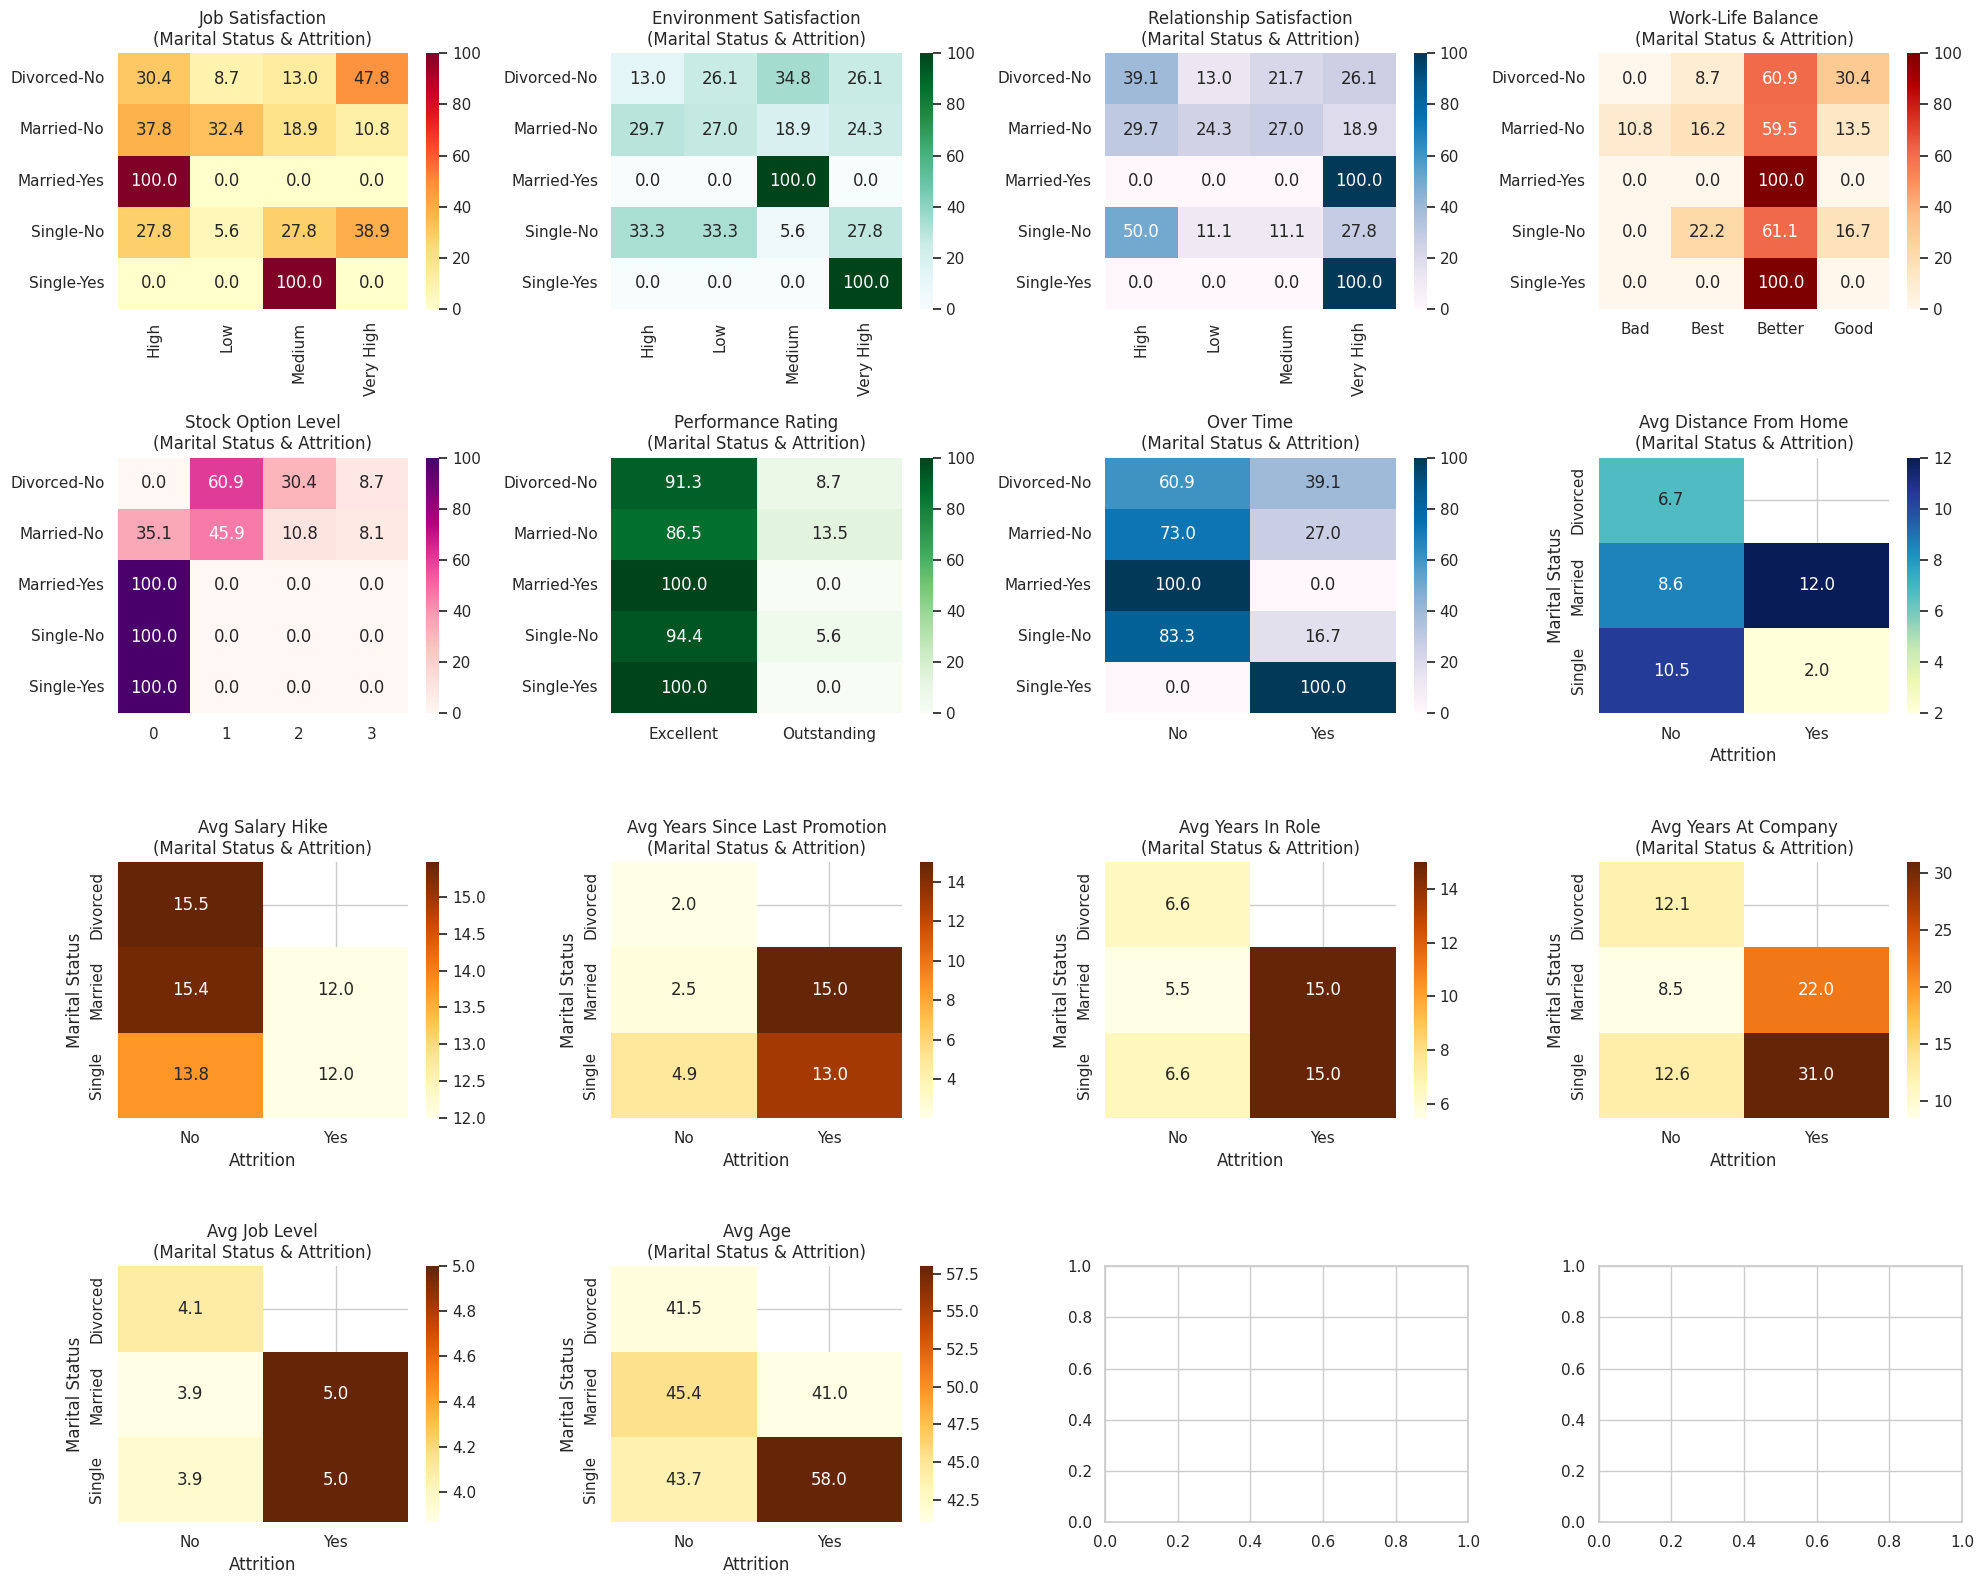

In [39]:
# Deep Dive into the Research Director Job Rule
subset = data[data['JobRole'] == 'ResearchDir']

# Categorical
cat_cols = [
    'JobSatisfaction', 'EnvSatisfaction','RelSatisfaction', 'WorkLife',
    'StockLevel', 'PerfRating', 'OverTime'
]
cat_titles = [
    'Job Satisfaction', 'Environment Satisfaction','Relationship Satisfaction', 'Work-Life Balance',
    'Stock Option Level', 'Performance Rating', 'Over Time'
]
cat_cmaps = ['YlOrRd', 'BuGn', 'PuBu', 'OrRd', 'RdPu', 'Greens', 'PuBu']

# Numerical
num_cols = ['HomeDist', 'SalaryHike', 'YrsSinceProm', 'YrsInRole', 'YrsAtCompany', 'JobLevel', 'Age']
num_titles = ['Avg Distance From Home', 'Avg Salary Hike', 'Avg Years Since Last Promotion',
              'Avg Years In Role', 'Avg Years At Company', 'Avg Job Level', 'Avg Age']
num_cmaps = ['YlGnBu', 'YlOrBr', 'YlOrBr', 'YlOrBr', 'YlOrBr', 'YlOrBr', 'YlOrBr']

total_plots = len(cat_cols) + len(num_cols)
rows, cols = 4, 4

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# Categorical heatmaps
for ax, col, title, cmap in zip(axes, cat_cols, cat_titles, cat_cmaps):
    pivot = pd.crosstab(
        [subset['MaritalStatus'], subset['Attrition']],
        subset[col],
        normalize='index'
    ) * 100
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap=cmap, ax=ax)
    ax.set_title(f'{title}\n(Marital Status & Attrition)')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Numerical heatmaps
for ax, col, title, cmap in zip(axes[len(cat_cols):], num_cols, num_titles, num_cmaps):
    pivot = subset.groupby(['MaritalStatus', 'Attrition'])[col].mean().unstack()
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap=cmap, ax=ax)
    ax.set_title(f'{title}\n(Marital Status & Attrition)')
    ax.set_xlabel('Attrition')
    ax.set_ylabel('Marital Status')

plt.tight_layout()
plt.show()

<Figure size 700x400 with 0 Axes>

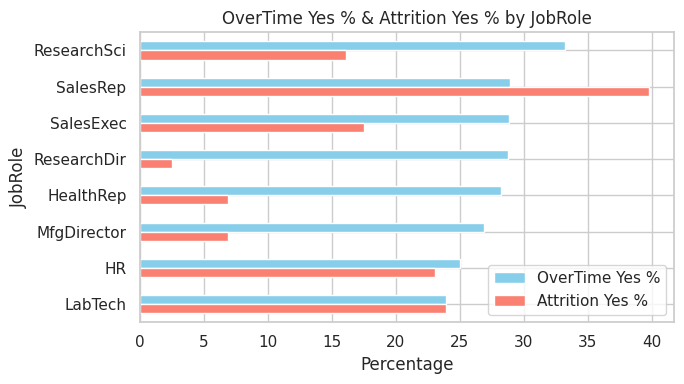

In [40]:
# OverTime Yes % & Attrition Yes % by JobRole
overtime = data.groupby('JobRole')['OverTime'].value_counts(normalize=True).unstack().fillna(0) * 100
attrition = data.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100

summary = pd.DataFrame({
    'OverTime Yes %': overtime['Yes'],
    'Attrition Yes %': attrition['Yes']
}).sort_values('OverTime Yes %', ascending=False)

plt.figure(figsize=(7, 4))
summary.plot(kind='barh', figsize=(7, 4), color=['skyblue', 'salmon'])
plt.title('OverTime Yes % & Attrition Yes % by JobRole')
plt.xlabel('Percentage')
plt.legend(['OverTime Yes %', 'Attrition Yes %'])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **📌 Final Insights & Conclusion**

Below is a detailed summary of all key patterns, numbers, and relations discovered from the employee attrition analysis.

---

### **1️⃣ Who Leaves The Most?**

- **Single males & females** have the **highest attrition %** overall.
- **Divorced females** have the **lowest attrition %** among marital statuses.
- By **Department & Gender**:
  - **HR females** have the highest attrition at **30%**.
  - **Sales males & females** are next:
    - **Females: 20%**
    - **Males: 21%**

---

### **2️⃣ By Job Role**

- **Sales Representatives**:
  - **Highest attrition** for both genders:
    - **Males: 37.8%**
    - **Females: 42.1%**
- **HR role (females)**: 37.5%
- **Laboratory Technician (males)**: 26.4%
- **Least attrition**: **Research Directors** for both genders.

---

### **3️⃣ Work Patterns & OverTime**

- **OverTime** is a major factor:
  - **Sales Rep**: 66.7% attrition if overtime is high.
  - **Lab Techs**: 50%.
  - **HR**: 38.5%.
- **Job Level & Marital Status**:
  - **Singles with Job Level 1**: 38.6% attrition.
  - **Divorced Level 5**: 0% attrition.
  - **Divorced Level 1**: 21% attrition.

---

### **4️⃣ Income & Job Role**

- **Research Directors** earn the highest avg monthly income: ~16,000.
- **Sales Reps, Lab Techs, Researchers, HR** are the lowest income group.
- **Unique finding**: Research Directors who **leave** earn more:
  - **Attrition Yes**: 19,396
  - **Attrition No**: 15,947

---

### **5️⃣ Research Director Deep Dive**

**Why would high-paid senior Research Directors leave?**

**Patterns for singles & married who attrite:**
- **Job Satisfaction**: Medium for singles who leave.
- **Environment Satisfaction**: Medium for married who leave.
- **Stock Option Level**: **Zero** for both singles & married attritors.
- **OverTime**: **100%** for singles who leave.
- **Salary Hike**: Very low (avg ~12%).
- **Years Since Last Promotion**:
  - Married attritors: ~15 years.
  - Single attritors: ~13 years.
- **Years In Role**:
  - ~15 years for both.
- **Years At Company**:
  - Married: ~22 years.
  - Singles: ~31 years.
- **Job Level**: Always **Level 5** — the highest — so promotion is capped.
- **Average Age**:
  - Married attritors: ~41 years.
  - Singles: ~58 years.
- **Performance Rating**: Always **Excellent**.

📌 **Key Insight**: High-performing senior people are stuck with **no promotion**, **no stock options**, **low salary hikes**, and **long tenures** → so they **burn out and leave**, especially with **100% overtime**.

---

### **6️⃣ Singles at Job Level 1 — Heatmap Deep Dive**

To find why **single, entry-level staff** attrite so much:
- **OverTime**: Drives **67.8% attrition**.
- **Department**: Sales → **60% attrition**.
- **Trainings Last Yr**:
  - 0–1 trainings → 50% attrition.
  - 2–3 → ~38%.
  - 4–5 → ~42–44%.
  - **6 trainings → only 9%** attrition.
- **Salary Band**: Lowest salaries → **66.7% attrition**.
- **Distance From Home**: Farthest → **47.8% attrition**.
- **Years Since Last Promotion**:
  - **7.5–15 years → 100% attrition**.
- **Age Bands**:
  - 18–38 → 45–36% attrition.
  - 38–48 → lowest at ~21%.
  - 48–58 → jumps back up to **50%**.


## **📌 Recommendations**

Based on the detailed attrition analysis, the following actions are recommended to **minimize voluntary turnover** and **retain top talent**:

---

### **1️⃣ Reduce OverTime & Improve Work-Life Balance**

- Closely monitor OverTime, especially for **entry-level Sales staff** and **Research Directors**.
- Enforce fair workload distribution to avoid burnout.
- Promote flexible scheduling and hybrid work options where feasible.

---

### **2️⃣ Expand Training & Development Programs**

- Increase training opportunities — employees with **6+ trainings/year show the lowest attrition**.
- Make development pathways clearer for **entry-level staff**, linking training to tangible promotion prospects.

---

### **3️⃣ Review Salary Hike & Incentives**

- Address cases with **low salary hikes** despite **excellent performance** — especially for senior staff with long tenure.
- Ensure salary adjustments are competitive and tied to market benchmarks and merit.

---

### **4️⃣ Fix Promotion Bottlenecks for High Levels**

- For roles like **Research Director**, where Job Level is maxed at Level 5:
  - Offer horizontal career growth: advisory roles, leadership tracks, special projects.
  - Reassess promotion frameworks to keep senior experts motivated and rewarded.

---

### **5️⃣ Re-evaluate Stock Options & Retention Packages**

- The lack of stock options is strongly linked with attrition among high performers.
- Design attractive retention packages with **equity, bonuses, or profit-sharing** for top contributors.

---

### **6️⃣ Consider Commute & Remote Work**

- Distance from home is linked to higher attrition — especially for **entry-level single employees**.
- Offer relocation support, hybrid roles, or satellite offices closer to clusters of employees.

---

### **7️⃣ Focus on High-Risk Segments**

- Prioritize targeted retention strategies for:
  - **Single males and females at Job Level 1**
  - Employees in **Sales** and **HR**
  - Roles with high OverTime and low training rates

---

### **✅ Final Word**

A holistic strategy combining **workload balance**, **growth opportunities**, **fair pay**, and **targeted retention** can dramatically lower costly turnover and secure long-term talent.

